# Generate Figure 1

Scripts ... have been run already.

In [70]:
from pathlib import Path
import toytree
import toyplot, toyplot.svg
import numpy as np
import pandas as pd
import itertools
import ipcoal
from concurrent.futures import ProcessPoolExecutor

In [71]:
# get an ultrametric imbalanced tree
TREE = toytree.rtree.imbtree(8, treeheight=1e6)
EDGES = [3, 4, 10, 11]
# EDGES = [0, 1, 2, 6, 7, 8, 9, 13, 14]
NE_DEFAULT = 5e5
GT_DEFAULT = 1
RNG = np.random.default_rng(123)
NLOCI = 10_000

## LOAD DATA

In [273]:
rax_gt_3 = pd.read_csv("./superset-rax-df-gt-1e3.csv", index_col=0)
rax_gt_5 = pd.read_csv("./superset-rax-df-gt-1e5.csv", index_col=0)
rax_ne_3 = pd.read_csv("./superset-rax-df-ne-1e3.csv", index_col=0)
rax_ne_5 = pd.read_csv("./superset-rax-df-ne-1e5.csv", index_col=0)
concat_gt = toytree.mtree("./superset-concat-gt.nwk")
# concat_ne = toytree.mtree("./superset-concat-ne.nwk")

In [278]:
# concat_gt.draw_cloud_tree(use_edge_lengths=False);

In [33]:
TREE = toytree.rtree.imbtree(8, treeheight=1e6)

In [36]:
rax_gt_3.sample(5000).gene_tree

36013    ((r2:0.007097,r6:0.00910...
17885    (((r1:0.006054,r7:0.0151...
11836    ((r5:0.008265,r3:0.00928...
42540    (((r1:0.006094,r2:0.0040...
39220    (r0:0.004029,r1:0.004026...
                    ...             
17002    (r5:0.008054,(((r0:0.006...
34648    ((r1:0.004469,r0:0.00355...
39133    (r5:0.008083,((r7:0.0144...
24596    (((r4:0.002,r6:0.007116)...
5736     ((r0:0.007055,r4:1e-06):...
Name: gene_tree, Length: 5000, dtype: object

In [41]:
dist_gt_3 = np.zeros(100)
for i in range(100):
    trees = rax_gt_3.sample(5000).gene_tree
    atree = ipcoal.phylo.infer_astral_tree(trees)
    dist = atree.distance.get_treedist_rfg_mci(TREE, normalize=True)
    dist_gt_3[i] = dist

In [48]:
pd.Series(dist_gt_3).to_csv("superset-rax-df-gt-1e3-dists.csv")

In [64]:
np.mean(dist_gt_3 != 0)

0.76

In [49]:
dist_gt_5 = np.zeros(100)
for i in range(100):
    trees = rax_gt_5.sample(5000).gene_tree
    atree = ipcoal.phylo.infer_astral_tree(trees)
    dist = atree.distance.get_treedist_rfg_mci(TREE, normalize=True)
    dist_gt_5[i] = dist

In [50]:
pd.Series(dist_gt_5).to_csv("superset-rax-df-gt-1e5-dists.csv")

In [63]:
np.mean(dist_gt_5 != 0)

0.62

In [51]:
dist_ne_3 = np.zeros(100)
for i in range(100):
    trees = rax_ne_3.sample(5000).gene_tree
    atree = ipcoal.phylo.infer_astral_tree(trees)
    dist = atree.distance.get_treedist_rfg_mci(TREE, normalize=True)
    dist_ne_3[i] = dist

In [52]:
pd.Series(dist_ne_3).to_csv("superset-rax-df-ne-1e3-dists.csv")

In [62]:
np.mean(dist_ne_3 != 0)

0.53

In [53]:
dist_ne_5 = np.zeros(100)
for i in range(100):
    trees = rax_ne_5.sample(5000).gene_tree
    atree = ipcoal.phylo.infer_astral_tree(trees)
    dist = atree.distance.get_treedist_rfg_mci(TREE, normalize=True)
    dist_ne_5[i] = dist

In [54]:
pd.Series(dist_ne_5).to_csv("superset-rax-df-ne-1e5-dists.csv")

In [61]:
np.mean(dist_ne_5 != 0)

0.22

### MAKE TREES

In [74]:
# set parameters on the species tree
tree_ne = TREE.copy()
tree_ne = tree_ne.set_node_data("Ne", {i: NE_DEFAULT * 20 for i in EDGES}, default=NE_DEFAULT)
tree_ne = tree_ne.set_node_data("gt", default=GT_DEFAULT)
tree_ne = tree_ne.set_node_data("tg", {i: i.dist / i.gt for i in tree_ne})
tree_ne = tree_ne.set_node_data("tc", {i: i.tg / (2 * i.Ne) for i in tree_ne})
tree_ne = tree_ne.set_node_data("theta", {i: 4 * i.Ne * 1e-8 for i in tree_ne})
tree_ne = tree_ne.set_node_data("rho", {i: 4 * i.Ne * 1e-9 for i in tree_ne})
tree_ne = tree_ne.set_node_data("tg_rho", {i: i.tg * i.rho for i in tree_ne})
tree_ne = tree_ne.set_node_data("tg_theta", {i: i.tg * i.theta * 1e-9 for i in tree_ne})

# convert edge lens to units of generations.
tree_ne = tree_ne.set_node_data("dist", {i: i.tg for i in tree_ne})

# show data
# tree_ne.get_node_data()

In [75]:
tree_gt = TREE.copy()
tree_gt = tree_gt.set_node_data("Ne", default=NE_DEFAULT)
tree_gt = tree_gt.set_node_data("gt", {i: GT_DEFAULT * 20 for i in EDGES}, default=GT_DEFAULT)
tree_gt = tree_gt.set_node_data("tg", {i: i.dist / i.gt for i in tree_gt})
tree_gt = tree_gt.set_node_data("tc", {i: i.tg / (2 * i.Ne) for i in tree_gt})
tree_gt = tree_gt.set_node_data("theta", {i: 4 * i.Ne * 1e-8 for i in tree_gt})
tree_gt = tree_gt.set_node_data("rho", {i: 4 * i.Ne * 1e-9 for i in tree_gt})
tree_gt = tree_gt.set_node_data("tg_rho", {i: i.tg * i.rho for i in tree_gt})
tree_gt = tree_gt.set_node_data("tg_theta", {i: i.tg * i.theta * 1e-9 for i in tree_gt})

# convert dist to units of generations. Draw and show data
tree_gt = tree_gt.set_node_data("dist", {i: i.tg for i in tree_gt})
# tree_gt.get_node_data()

### Astral on true genealogies

In [76]:
def one_batch_sim(tree, nloci, nsites, nthreads, seed, infer):
    """Return two dataframes with genealogies and gene trees, respectively."""
    model = ipcoal.Model(tree=tree, seed_trees=seed, seed_mutations=seed)
    model.sim_loci(nloci, nsites)
    if (nsites == 1) or (not infer):
        raxdf = None
    else:
        raxdf = ipcoal.phylo.infer_raxml_ng_trees(
            model, nthreads=nthreads, nproc=1, nworkers=1, do_not_autoscale_threads=True)
    return model.df, raxdf

In [77]:
def batch_sims(tree: toytree.ToyTree, nloci: int = 1000, nsites: int = 1e4, njobs: int = 10, nthreads: int = 4, infer: bool = True):    
    """Return dataframes from simulations and tree inferences distributed to run in parallel"""
    if nloci == 1:
        return one_batch_sim(tree, nloci, nsites, nthreads, None)

    # not perfect
    nloci_per = int(nloci / njobs)
    rasyncs = {}
    with ProcessPoolExecutor(max_workers=njobs) as pool:
        for i in range(njobs):
            rasyncs[i] = pool.submit(one_batch_sim, *(tree, nloci_per, nsites, nthreads, None, infer))
    gdata = []
    rdata = []
    for i in range(njobs):
        gdf, rdf = rasyncs[i].result()
        gdf.locus += i * nloci_per
        gdata.append(gdf)
        if rdf is not None:
            rdf.locus += i * nloci_per
            rdata.append(rdf)
    gdata = pd.concat(gdata, ignore_index=True)
    if rdata:
        rdata = pd.concat(rdata, ignore_index=True)
    return gdata, rdata

In [86]:
dist_ne_true = np.zeros(100)
atrees = []
for i in range(100):
    df, _ = batch_sims(tree_ne, 5000, nsites=1, njobs=50, nthreads=1, infer=False)
    atree = ipcoal.phylo.infer_astral_tree(df.genealogy)
    atrees.append(atree)
    dist = atree.distance.get_treedist_rfg_mci(TREE, normalize=True)
    dist_ne_true[i] = dist
    
toytree.mtree(atrees).write("./astral-tree=set-gt-true.nwk")
pd.Series(dist_ne_true).to_csv("superset-df-ne-true-dists.csv")
dist_ne_true.mean()

In [87]:
pd.Series(dist_ne_true).to_csv("superset-df-ne-true-dists.csv")
dist_ne_true.mean()

0.09330596375394208

In [159]:
dist_gt_true = np.zeros(100)
atrees = []
for i in range(100):
    df, _ = batch_sims(tree_gt, 5000, nsites=1, njobs=50, nthreads=1, infer=False)
    atree = ipcoal.phylo.infer_astral_tree(df.genealogy)
    atrees.append(atree)
    dist = atree.distance.get_treedist_rfg_mci(TREE, normalize=True)
    dist_gt_true[i] = dist
toytree.mtree(atrees).write("./astral-tree=set-gt-true.nwk")
pd.Series(dist_gt_true).to_csv("superset-df-gt-true-dists.csv")
dist_gt_true.mean()

0.11585003613397796

# 1. Plot errors 

1. True genealogies Ne
2. True genealogies tg
3. Concat Ne 
4. Concat tg
5. Astral Ne (short and long)
6. Astral tg (short and long)
7. SNAQ Ne 
8. SNAQ tg


In [200]:
data = pd.Series({
    "concat_Ne": 1.0,
    "concat_tg": 1.0,
    "astral_true_Ne": 0.093305,
    "astral_true_tg": 0.11585,
    "astral_raxml_Ne_1e3": 0.53,
    "astral_raxml_tg_1e3": 0.76,
    "astral_raxml_Ne_1e5": 0.22,
    "astral_raxml_tg_1e5": 0.62,
    },
)

In [201]:
data

concat_Ne              1.000000
concat_tg              1.000000
astral_true_Ne         0.093305
astral_true_tg         0.115850
astral_raxml_Ne_1e3    0.530000
astral_raxml_tg_1e3    0.760000
astral_raxml_Ne_1e5    0.220000
astral_raxml_tg_1e5    0.620000
dtype: float64

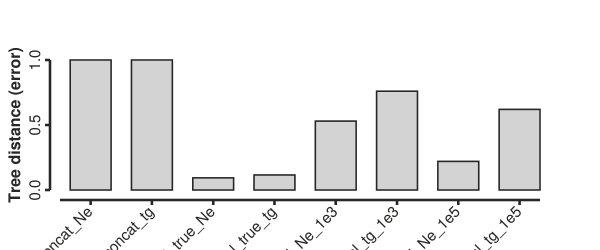

In [202]:
canvas = toyplot.Canvas(width=600, height=250)
axes = canvas.cartesian()
axes.x.ticks.locator = toyplot.locator.Explicit(np.arange(data.size) + 0.5, data.index)
# axes.x.label.text = "Phylogenetic dataset "
axes.x.spine.style["stroke-width"] = 2.5
axes.x.ticks.style["stroke-width"] = 2.5
axes.x.ticks.labels.style["font-size"] = 15
axes.x.label.style["font-size"] = 16
axes.x.domain.min = 0
axes.x.ticks.labels.angle = 45

axes.y.label.text = "Tree distance (error)"
axes.y.spine.style["stroke-width"] = 2.5
axes.y.ticks.style["stroke-width"] = 2.5
axes.y.ticks.labels.style["font-size"] = 15
axes.y.ticks.labels.style["font-size"] = 15
axes.y.label.style["font-size"] = 16
# axes.y.domain.max = 0.5

starts = np.arange(data.size) + 1 / 6
mark = axes.bars(
    starts, 
    starts + 4/6,
    data,
    style={"stroke": "#262626", "stroke-width": 1.5, "fill": "lightgrey"},
)

toytree.utils.set_axes_ticks_external(axes);

toyplot.svg.render(canvas, "./tree-inference-errors.svg")
canvas
# mark.extents()
# toytree.utils.set_axes_box_outline(axes);

# 2. Plot tree distributions

1. True genealogies Ne
2. True genealogies tg
3. Ne short
4. Ne long
5. tg short
6. tg long

In [110]:
rax_gt_3 = pd.read_csv("./superset-rax-df-gt-1e3.csv", index_col=0)
rax_gt_5 = pd.read_csv("./superset-rax-df-gt-1e5.csv", index_col=0)
rax_ne_3 = pd.read_csv("./superset-rax-df-ne-1e3.csv", index_col=0)
rax_ne_5 = pd.read_csv("./superset-rax-df-ne-1e5.csv", index_col=0)

#### GT 1e3

In [180]:
m = toytree.mtree(rax_gt_3.gene_tree)
counts = m.get_unique_topologies()
hist = [j for i, j in counts]

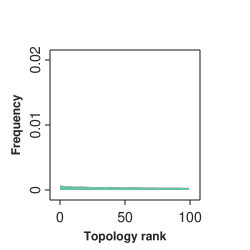

In [181]:
c, a, m = toyplot.fill(np.array(hist)[:100] / 50000, height=250, width=250, ymax=0.02)#xmin=1,)# xscale="log")
a.x.label.text = "Topology rank"
a.y.label.text = "Frequency"
# a.label.text = "inferred gene trees (var=tg, loclen=1e3)"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
canvas.style["stroke-width"] = 3
a.y.domain.max = 0.02
a.y.ticks.locator = toyplot.locator.Explicit([0.0, 0.01, 0.02])
a.y.ticks.labels.style['font-size'] = 14
a.x.ticks.labels.style['font-size'] = 14
toyplot.svg.render(c, "./tree-distribution-tg-1e3.svg")
c

In [182]:
counts[0][0].root("r7").ladderize().draw(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tffe53bcf61a747f4a008be37dd50043e"> r7 r5 r4 r3 r6 r2 r1 r0

#### GT 1e5

In [183]:
m = toytree.mtree(rax_gt_5.gene_tree)
counts = m.get_unique_topologies()
hist = [j for i, j in counts]

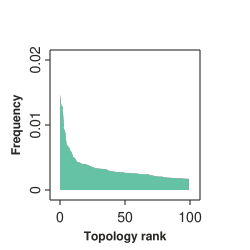

In [184]:
c, a, m = toyplot.fill(np.array(hist)[:100] / 50000, height=250, width=250, ymax=0.02)#xmin=1,)# xscale="log")
a.x.label.text = "Topology rank"
a.y.label.text = "Frequency"
# a.label.text = "inferred gene trees (var=tg, loclen=1e5)"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
canvas.style["stroke-width"] = 3
a.y.domain.max = 0.02
a.y.ticks.locator = toyplot.locator.Explicit([0.0, 0.01, 0.02])
a.y.ticks.labels.style['font-size'] = 14
a.x.ticks.labels.style['font-size'] = 14
toyplot.svg.render(c, "./tree-distribution-tg-1e5.svg")
c

In [185]:
counts[0][0].root("r7").ladderize().draw(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tf7cc759b7149479eb9844a874a12c165"> r7 r6 r5 r3 r4 r2 r1 r0

#### Ne 1e3

In [186]:
m = toytree.mtree(rax_ne_3.gene_tree)
counts = m.get_unique_topologies()
hist = [j for i, j in counts]

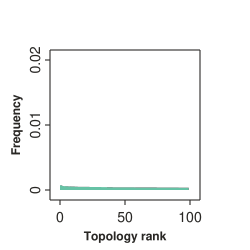

In [187]:
c, a, m = toyplot.fill(np.array(hist)[:100] / 50000, height=250, width=250, ymax=0.02)#xmin=1,)# xscale="log")
a.x.label.text = "Topology rank"
a.y.label.text = "Frequency"
# a.label.text = "inferred gene trees (var=Ne, loclen=1e3)"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
canvas.style["stroke-width"] = 3
a.y.domain.max = 0.02
a.y.ticks.locator = toyplot.locator.Explicit([0.0, 0.01, 0.02])
a.y.ticks.labels.style['font-size'] = 14
a.x.ticks.labels.style['font-size'] = 14
toyplot.svg.render(c, "./tree-distribution-ne-1e3.svg")
c

In [188]:
counts[0][0].root("r7").ladderize().draw(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9e3628c574b645aa9679300e8a1040a6"> r7 r3 r5 r4 r6 r2 r1 r0

#### Ne 1e5

In [189]:
m = toytree.mtree(rax_ne_5.gene_tree)
counts = m.get_unique_topologies()
hist = [j for i, j in counts]

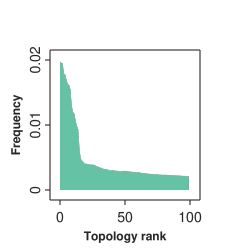

In [190]:
c, a, m = toyplot.fill(np.array(hist)[:100] / 50000, height=250, width=250, ymax=0.02)#xmin=1,)# xscale="log")
a.x.label.text = "Topology rank"
a.y.label.text = "Frequency"
# a.label.text = "inferred gene trees (var=Ne, loclen=1e5)"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
canvas.style["stroke-width"] = 3
a.y.domain.max = 0.02
a.y.ticks.locator = toyplot.locator.Explicit([0.0, 0.01, 0.02])
a.y.ticks.labels.style['font-size'] = 14
a.x.ticks.labels.style['font-size'] = 14
toyplot.svg.render(c, "./tree-distribution-ne-1e5.svg")
c

In [191]:
counts[0][0].root("r7").ladderize().draw(use_edge_lengths=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="275.0px" viewBox="0 0 300.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t17c7f5545214469d9e66916e7fae6808"> r7 r6 r5 r4 r3 r2 r0 r1

#### true genealogy distribution

In [163]:
df, _ = batch_sims(tree_gt, 50_000, nsites=1, njobs=50, nthreads=1, infer=False)

In [192]:
m = toytree.mtree(df.genealogy)
counts = m.get_unique_topologies()
hist = [j for i, j in counts]

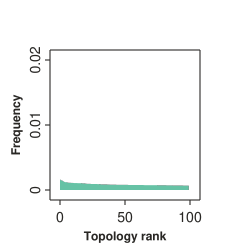

In [193]:
c, a, m = toyplot.fill(np.array(hist)[:100] / 50000, height=250, width=250, ymax=0.02)#xmin=1,)# xscale="log")
a.x.label.text = "Topology rank"
a.y.label.text = "Frequency"
# a.label.text = "true distribution of unlinked genealogies"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
canvas.style["stroke-width"] = 3
a.y.domain.max = 0.02
a.y.ticks.locator = toyplot.locator.Explicit([0.0, 0.01, 0.02])
a.y.ticks.labels.style['font-size'] = 14
a.x.ticks.labels.style['font-size'] = 14
toyplot.svg.render(c, "./tree-distribution-true.svg")
c

# RUN SNAQ

In [212]:
J = "/home/deren/local/julia-1.8.1/bin/julia"

In [280]:
def batch_snaq(trees, nworkers, nreps, name):
    rasyncs = {}
    with ProcessPoolExecutor(max_workers=nworkers) as pool:
        for i in range(nreps):
            
            subset = trees.sample(5000)
            
            rasyncs[i] = pool.submit(
                ipcoal.phylo.infer_snaq_network,
                **dict(trees=subset, name=f"{name}-{i}", binary_path=J, starting_tree=tree_ne)
            )
    results = [i.result() for i in rasyncs.values()]
    
    #netfiles = Path(f"/tmp/analysis-snaq/").glob(f"{name}*-*.networks")
    #return [toytree.network.parse_network_to_tree_and_admix(i) for i in netfiles]

In [243]:
true_snaqs_all = true_snaqs + true_snaqs_48

In [465]:
trees = []
gammas = []
for result in true_snaqs_all:
    tree, admix = result
    admix = admix[0]
    tree.set_node_data("src", {tree.get_mrca_node(*admix[0]): admix[4]}, inplace=True)
    tree.set_node_data("dest", {tree.get_mrca_node(*admix[1]): admix[4]}, inplace=True)
    trees.append(tree)
    gammas.append(float(admix[4]))
toytree.mtree(trees).write("snaq-trees-true.nwk", features=["src", "dest"])
gammas = pd.Series(gammas)
gammas.to_csv("snaq-gammas-true.csv")
gammas.describe()

count    57.000000
mean      0.077521
std       0.091714
min       0.007620
25%       0.017500
50%       0.038900
75%       0.109000
max       0.439000
dtype: float64

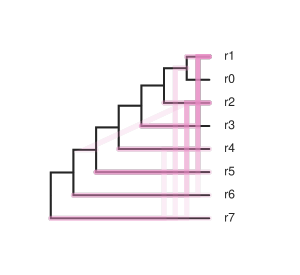

In [480]:
m = toytree.mtree("./snaq-trees-true.nwk")
m.root("r7", inplace=True)
m.treelist = [i.ladderize() for i in m.treelist]
most_frequent_topo = m.get_unique_topologies()[0][0]

admixes = []
for tree in m.treelist:
    if tree.distance.get_treedist_rfg_mci(most_frequent_topo) == 0:
        src = [i for i in tree if hasattr(i, "src")][0]
        dst = [i for i in tree if hasattr(i, "dest")][0]
        admixes.append((src.idx, dst.idx, 0.5, {"opacity": 0.25}))
c, a, m = most_frequent_topo.draw(use_edge_lengths=False, admixture_edges=admixes);
toyplot.svg.render(c, "./snaq-network-cloud-true.svg")
c

In [323]:
ghist = np.histogram(gammas.values, bins=10, density=True)

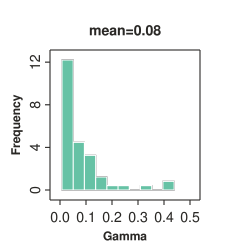

In [333]:
c, a, m = toyplot.bars(ghist, height=250, width=250,)# ymax=0.02)#xmin=1,)# xscale="log")
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
a.label.text = f"mean={gammas.mean():.2f}"#" gene trees (var=tg, loclen=1e5)"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
canvas.style["stroke-width"] = 3
# a.y.ticks.locator = toyplot.locator.Explicit([0.0, 0.01, 0.02])
a.y.ticks.labels.style['font-size'] = 14
a.x.ticks.labels.style['font-size'] = 14
a.x.domain.max = 0.5
toyplot.svg.render(c, "./snaq-distribution-true.svg")
c

Question: do the admixture edges usually contain the two short tg edges?

Draw the most frequently observed tree with admixture edge

In [279]:
gt5_snaqs60 = batch_snaq(rax_gt_5.gene_tree, nworkers=12, nreps=60, name="gt5")

ValueError: too many values to unpack (expected 2)

In [483]:
def process_snaq(name, only_correct: bool = False):
    netfiles = Path(f"/tmp/analysis-snaq/").glob(f"{name}*-*.networks")
    trees = []
    gammas = []
    for file in netfiles:
        try:
            tree, admix, *other = toytree.network.parse_network_to_tree_and_admix(file)
        except ValueError:
            print('skipping', file)
            continue
        admix = admix[0]
        tree.set_node_data("src", {tree.get_mrca_node(*admix[0]): admix[4]}, inplace=True)
        tree.set_node_data("dest", {tree.get_mrca_node(*admix[1]): admix[4]}, inplace=True)
        
        if only_correct:
            if tree.distance.get_treedist_rfg_mci(TREE) == 0:
                trees.append(tree)
                gammas.append(float(admix[4]))
        else:
            trees.append(tree)
            gammas.append(float(admix[4]))
    toytree.mtree(trees).write(f"snaq-trees-{name}.nwk", features=["src", "dest"])
    gammas = pd.Series(gammas)
    gammas.to_csv(f"snaq-gammas-{name}.csv")
    print(gammas.describe())

    ghist = np.histogram(gammas.values, bins=10, density=True)
    c, a, m = toyplot.bars(ghist, height=250, width=250,)# ymax=0.02)#xmin=1,)# xscale="log")
    a.x.label.text = "Gamma"
    a.y.label.text = "Frequency"
    a.label.text = f"mean={gammas.mean():.2f}"
    toytree.utils.set_axes_ticks_external(a)
    toytree.utils.set_axes_box_outline(a)
    canvas.style["stroke-width"] = 3
    # a.y.ticks.locator = toyplot.locator.Explicit([0.0, 0.01, 0.02])
    a.y.ticks.labels.style['font-size'] = 14
    a.x.ticks.labels.style['font-size'] = 14
    a.x.domain.max = 0.5
    a.y.domain.max = 12
    toyplot.svg.render(c, f"./snaq-distribution-{name}.svg")
    return c

skipping /tmp/analysis-snaq/gt3-24-snaq-p3438255.snaq.net-1.networks
count    20.000000
mean      0.111355
std       0.138820
min       0.010600
25%       0.020575
50%       0.057400
75%       0.121750
max       0.439000
dtype: float64


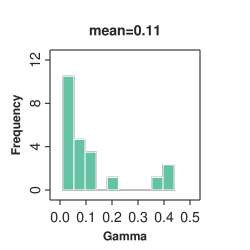

In [491]:
process_snaq("gt3", only_correct=True)

In [374]:
process_snaq("gt3")

In [375]:
process_snaq("ne5")

In [376]:
process_snaq("ne3")

In [282]:
ne5_snaqs60 = batch_snaq(rax_ne_5.gene_tree, nworkers=12, nreps=60, name="ne5")

In [ ]:
netfiles = Path(f"/tmp/analysis-snaq/").glob(f"{name}*-*.networks")


In [283]:
gt3_snaqs60 = batch_snaq(rax_gt_3.gene_tree, nworkers=12, nreps=60, name="gt3")

In [284]:
ne3_snaqs60 = batch_snaq(rax_ne_3.gene_tree, nworkers=12, nreps=60, name="ne3")

### MOST FREQUENT NETS

In [416]:
m = toytree.mtree("./snaq-trees-ne5.nwk")
m.root("r7", inplace=True)
m.treelist = [i.ladderize() for i in m.treelist]
match = 0
for tree in m.treelist:
    if tree.distance.get_treedist_rf(TREE) == 0:
        match += 1
print(1 - (match / len(m)), "wrong")

0.14166666666666672 wrong


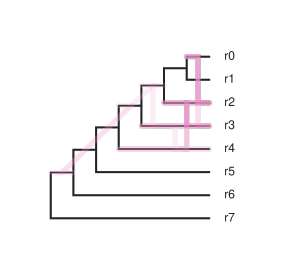

In [481]:
m = toytree.mtree("./snaq-trees-gt5.nwk")
m.root("r7", inplace=True)
m.treelist = [i.ladderize() for i in m.treelist]
most_frequent_topo = m.get_unique_topologies()[0][0]

admixes = []
for tree in m.treelist:
    if tree.distance.get_treedist_rfg_mci(most_frequent_topo) == 0:
        src = [i for i in tree if hasattr(i, "src")][0]
        dst = [i for i in tree if hasattr(i, "dest")][0]
        admixes.append((src.idx, dst.idx, 0.5, {"opacity": 0.25}))
c, a, m = most_frequent_topo.draw(use_edge_lengths=False, admixture_edges=admixes);
toyplot.svg.render(c, "./snaq-network-cloud-gt5.svg")
c

In [461]:
# len(m), len(admixes)

TypeError: object of type 'ToyTreeMark' has no len()

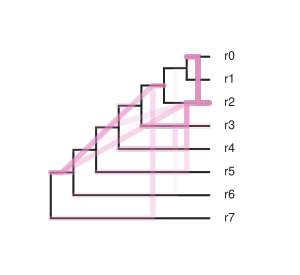

In [482]:
m = toytree.mtree("./snaq-trees-ne5.nwk")
m.root("r7", inplace=True)
m.treelist = [i.ladderize() for i in m.treelist]
most_frequent_topo = m.get_unique_topologies()[0][0]

admixes = []
for tree in m.treelist:
    if tree.distance.get_treedist_rfg_mci(most_frequent_topo) == 0:
        src = [i for i in tree if hasattr(i, "src")][0]
        dst = [i for i in tree if hasattr(i, "dest")][0]
        admixes.append((src.idx, dst.idx, 0.5, {"opacity": 0.12}))
c, a, m = most_frequent_topo.draw(use_edge_lengths=False, admixture_edges=admixes);
toyplot.svg.render(c, "./snaq-network-cloud-ne5.svg")
c

# OLD

In [2]:
BAL_NE_1000 = "../scripts/results-bal-Ne-1000.tsv"
BAL_NE_10000 = "../scripts/results-bal-Ne-10000.tsv"
# BAL_NE_1000000 = "../scripts/results-bal-Ne-1000000-tmp.tsv"

BAL_GT_1000 = "../scripts/results-bal-gt-1000.tsv"
BAL_GT_10000 = "../scripts/results-bal-gt-10000.tsv"

In [3]:
BAL_NE_CONCAT = "../results/bal-fixN-varG-concat.csv"
BAL_GT_CONCAT = "../results/bal-varN-fixG-concat.csv"

In [4]:
NAMES = ["nloci", "nsites", "mean_snps_per_locus", "mean_topos_per_locus", "n_inferred_topos", 
         "astral_true_tree", "astral_true_rf", "astral_true_qrt",
         "astral_inferred_tree", "astral_inferred_rf", "astral_inferred_qrt",
        ]

In [6]:
balfixNvarG = pd.read_csv(BAL_GT_CONCAT, index_col=0)
balvarNfixG = pd.read_csv(BAL_NE_CONCAT, index_col=0)

balvarNfixG_1e3 = pd.read_csv(BAL_NE_1000, index_col=2, names=NAMES, delim_whitespace=True, header=None).sort_index()
balvarNfixG_1e4 = pd.read_csv(BAL_NE_10000, index_col=2, names=NAMES, delim_whitespace=True, header=None).sort_index()
# balvarNfixG_1e6 = pd.read_csv(BAL_NE_1000000, index_col=2, names=NAMES, delim_whitespace=True, header=None).sort_index()

balfixNvarG_1e3 = pd.read_csv(BAL_GT_1000, index_col=2, names=NAMES, delim_whitespace=True, header=None).sort_index()
balfixNvarG_1e4 = pd.read_csv(BAL_GT_10000, index_col=2, names=NAMES, delim_whitespace=True, header=None).sort_index()


In [10]:
balvarNfixG_1e3.head()

,nloci,nsites,mean_snps_per_locus,mean_topos_per_locus,n_inferred_topos,astral_true_tree,astral_true_rf,astral_true_qrt,astral_inferred_tree,astral_inferred_rf,astral_inferred_qrt
0,1000,1000.0,11.891552,3.787,943,"(r6:1,(r7:1,((r4:1,r5:1)1:0.284440578528,((r0:...",0.0,0.0,"(r1:1,(r0:1,((r2:1,r3:1)1:0.210076607028,((r6:...",0.0,0.0
1,1000,1000.0,11.803603,3.943,950,"(r7:1,(r6:1,((r4:1,r5:1)1:0.283942818438,((r1:...",0.0,0.0,"(r0:1,(r1:1,((r3:1,r2:1)1:0.286233655581,((r6:...",0.0,0.0
2,1000,1000.0,12.168306,3.815,948,"(r7:1,(r6:1,((r5:1,r4:1)1:0.278483747808,((r2:...",0.0,0.0,"(r2:1,(r3:1,((r0:1,r1:1)0.72:0.0270794026317,(...",0.0,0.0
3,1000,1000.0,11.990354,3.839,954,"(r2:1,(r3:1,((r0:1,r1:1)0.59:0.0201823197499,(...",0.0,0.0,"(r2:1,(r3:1,((r1:1,r0:1)0.69:0.0259564196845,(...",0.0,0.0
4,1000,1000.0,12.140818,3.769,967,"(r0:1,(r1:1,((r3:1,r2:1)1:0.206640862449,((r5:...",0.0,0.0,"(r2:1,(r3:1,((r1:1,r0:1)0.99:0.072681845272,((...",0.0,0.0


In [11]:
balvarNfixG_1e4.head()

,nloci,nsites,mean_snps_per_locus,mean_topos_per_locus,n_inferred_topos,astral_true_tree,astral_true_rf,astral_true_qrt,astral_inferred_tree,astral_inferred_rf,astral_inferred_qrt
0,10,10000.0,11.977480,28.0,10,"(r5:1,(r4:1,(r2:1,((r1:1,(r3:1,r0:1)0.45:0.046...",0.429530,0.357143,"(r7:1,((r6:1,r4:1)0.59:0.136132174325,(r1:1,(r...",0.641749,0.500000
1,10,10000.0,12.316063,23.7,10,"(r2:1,(r3:1,(((r1:1,r7:1)0.36:0,(r0:1,r6:1)0.4...",0.527081,0.471429,"(r4:1,(r5:1,(r6:1,((r0:1,(r7:1,r1:1)0.59:0.136...",0.368401,0.357143
2,10,10000.0,12.124660,30.1,9,"(r6:1,((r0:1,(r4:1,r5:1)0.76:0.269663566949)0....",0.555737,0.485714,"(r5:1,((r6:1,(r7:1,(r1:1,(r0:1,(r2:1,r3:1)0.94...",0.309198,0.228571
3,10,10000.0,12.843174,26.7,10,"(r4:1,(((r0:1,(r7:1,r1:1)0.38:0)0.42:0.0229895...",0.484845,0.471429,"(r1:1,(((r3:1,r2:1)0.91:0.434285546644,(r7:1,(...",0.614697,0.571429
4,10,10000.0,11.834580,26.8,10,"(r1:1,(((r5:1,r4:1)0.63:0.164303051291,(r7:1,(...",0.702710,0.671429,"(r2:1,((r7:1,(r1:1,(r6:1,(r4:1,(r3:1,r5:1)0.53...",0.720222,0.657143


In [12]:
print(
    balvarNfixG_1e3.astral_true_rf.mean(),
    balvarNfixG_1e4.astral_true_rf.mean(),
    balfixNvarG_1e3.astral_true_rf.mean(),
    balfixNvarG_1e4.astral_true_rf.mean(),
#     balvarNfixG_1e6.astral_true_rf.mean(),
)

0.04922000076671332 0.4772473068813888 0.062430825955553645 0.06536529500462647


In [24]:
dists = [
    balvarNfixG.dist_qrt.mean(),
    
    balvarNfixG_1e3.astral_true_qrt.mean(),
    balvarNfixG_1e3.astral_inferred_qrt.mean(),
    #balvarNfixG_1e4.astral_true_qrt.mean(),
    #balvarNfixG_1e4.astral_inferred_qrt.mean(),
    
    balfixNvarG.dist_qrt.mean(),

    balfixNvarG_1e3.astral_true_qrt.mean(),
    balfixNvarG_1e3.astral_inferred_qrt.mean(),
    
    balfixNvarG_1e4.astral_true_qrt.mean(),
    balfixNvarG_1e4.astral_inferred_qrt.mean(),

    #balvarNfixG_1e6.astral_true_qrt.mean(),
    #balvarNfixG_1e6.astral_inferred_qrt.mean(),
]

data = np.array(dists)

In [25]:
canvas = toyplot.Canvas(width=450, height=250)
axes = canvas.cartesian()
axes.x.ticks.locator = toyplot.locator.Explicit(np.arange(data.size) + 0.5, )
axes.x.label.text = "Phylogenetic dataset "
axes.x.spine.style["stroke-width"] = 2.5
axes.x.ticks.style["stroke-width"] = 2.5
axes.x.ticks.labels.style["font-size"] = 15
axes.x.label.style["font-size"] = 16
axes.x.domain.min = 0

axes.y.label.text = "Tree distance (error)"
axes.y.spine.style["stroke-width"] = 2.5
axes.y.ticks.style["stroke-width"] = 2.5
axes.y.ticks.labels.style["font-size"] = 15
axes.y.ticks.labels.style["font-size"] = 15
axes.y.label.style["font-size"] = 16
axes.y.domain.max = 0.5

starts = np.arange(data.size) + 1 / 6
mark = axes.bars(
    starts, 
    starts + 4/6,
    data,
    style={"stroke": "#262626", "stroke-width": 1.5, "fill": "lightgrey"},
)

toytree.utils.set_axes_ticks_external(axes);
# toytree.utils.set_axes_box_outline(axes);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="450.0px" height="250.0px" viewBox="0 0 450.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t85df78f50439465ba25817326d666a54"> 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 Phylogenetic dataset 0.0 0.1 0.2 0.3 0.4 0.5 Tree distance (error)